In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Make a ML model to predict  the price of a house that to be sold

In [9]:
#Label(Price) is given therefore, supervisd ML

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [29]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [36]:
#std high therfore, outliers in bar plot

In [13]:
df['Price'].nunique()  #all prices are different - 5000

5000

In [11]:
df['Price'][0]

1059033.5578701235

In [45]:
#7 columns, no missing data, which one of these are features?
#try to find out relation of all the columns with label

In [17]:
#values are continuosly changing, no need of value_counts, therfore, hist

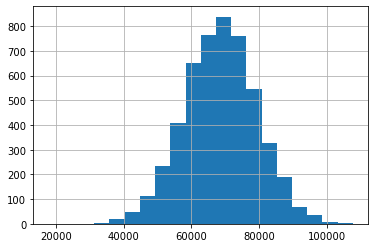

In [21]:
df['Avg. Area Income'].hist(bins = 20) #most - 60000 to 80000

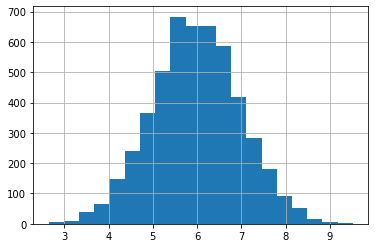

In [20]:
df['Avg. Area House Age'].hist(bins = 20) #most - 5 to 7 years old

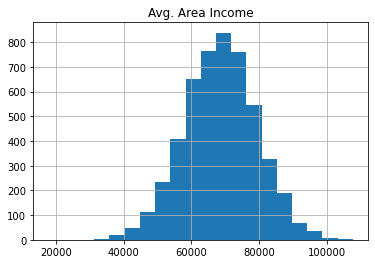

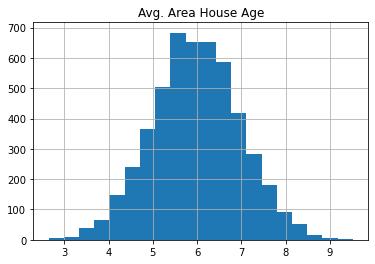

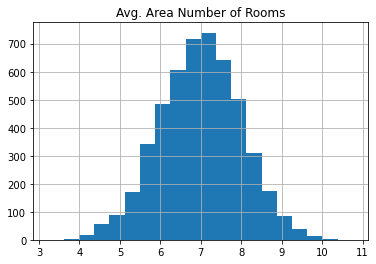

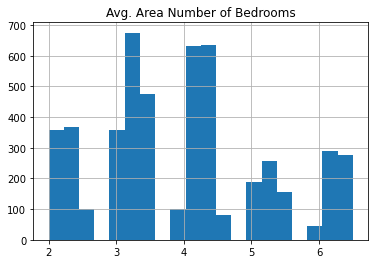

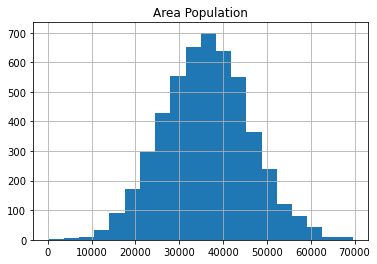

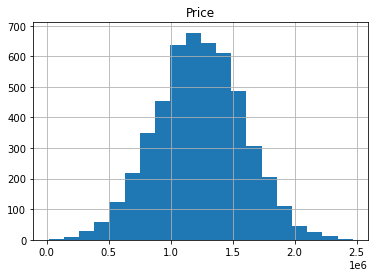

In [25]:
for i in df.columns[:-1]:
    df[i].hist(bins = 20)
    plt.title(i)
    plt.show()

In [30]:
#for relationship - scatter plot

In [31]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

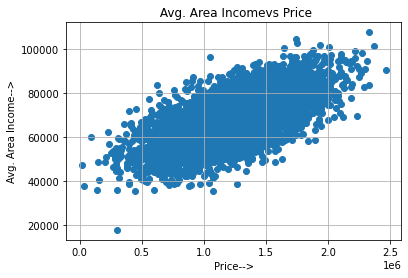

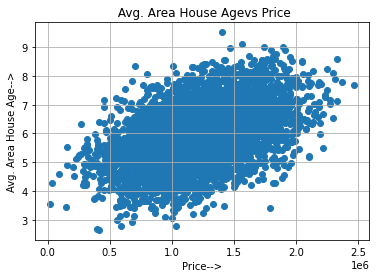

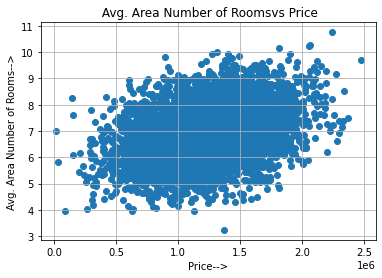

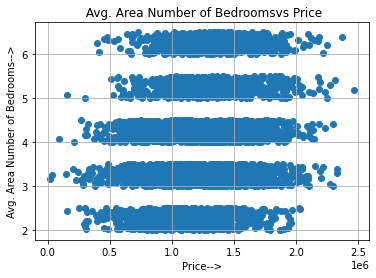

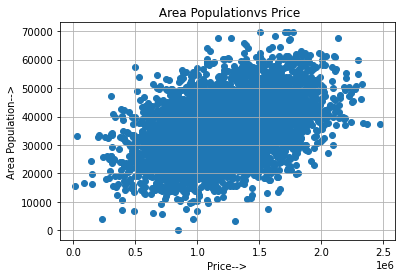

In [37]:
for i in df.columns[:-2]:
    plt.scatter(df['Price'], df[i])
    plt.xlabel('Price-->')
    plt.ylabel(i + '-->')
    plt.title(' ' +i + 'vs Price')
    plt.grid()
    plt.show()

In [39]:
import seaborn as sns #more ice plot

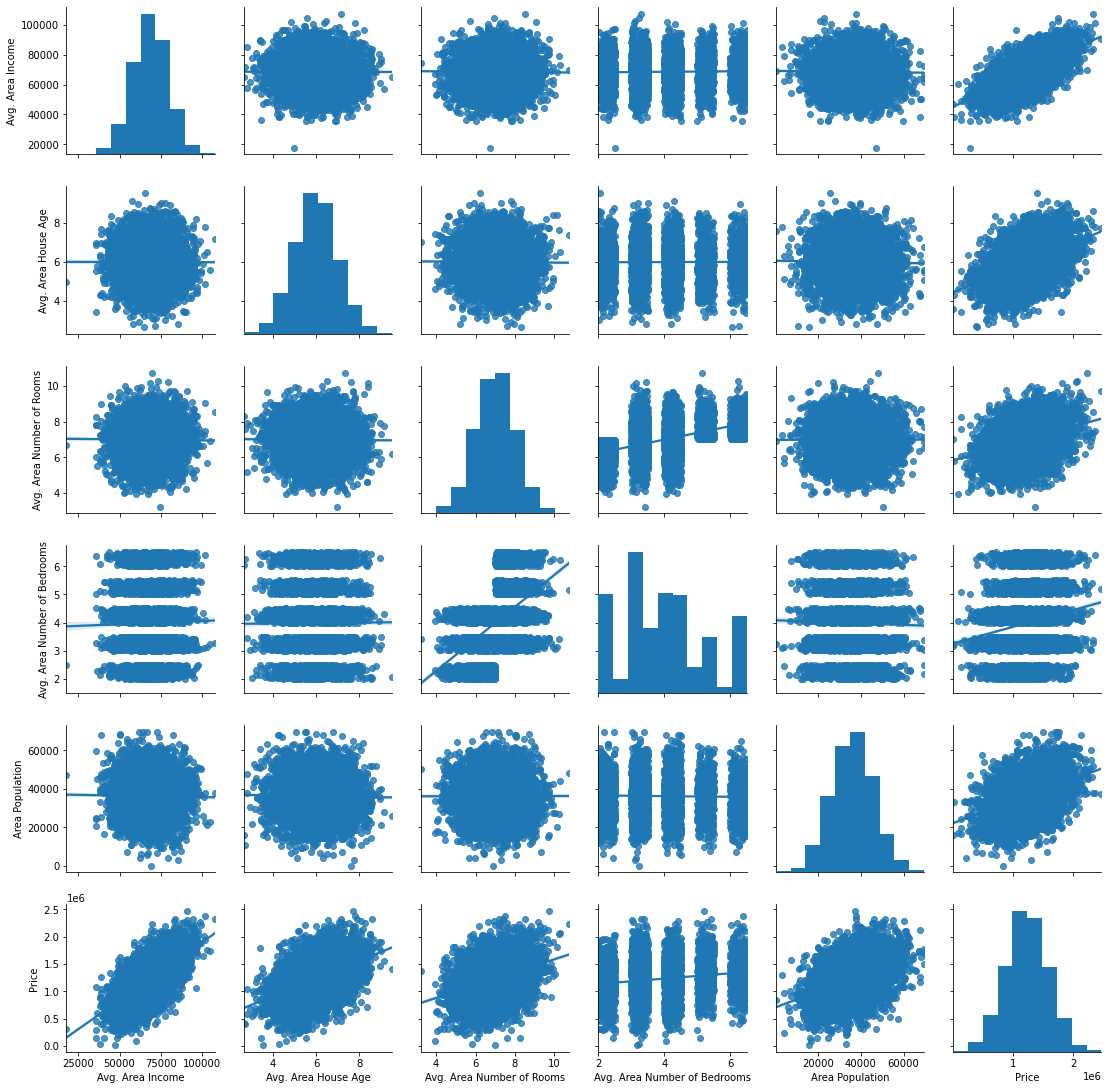

In [41]:
sns.pairplot(df, kind = 'reg') 
#rltnshp of every column with every column

In [44]:
#interested in price with every column, 
#also we have lines which shows linear regression with price
#no. of bedrooms - no linearity

In [46]:
#features - income, house age, no. of rooms, population

In [48]:
df['Address'][0] #text data
#for now let's omit this 

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [49]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [54]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Area Population']]
y = df['Price']
#We got cleaned data

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [53]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
#for splitting data

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 10)
#random_state -> randomness pattern is same, if we keep a random_stat, then we are keeping the pattern same
#necessary when we are running the code again and again 
#to avoid diiferent results

In [57]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4875 to 1289
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [58]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [60]:
ytrain.shape

(3750,)

In [61]:
ytest.shape

(1250,)

In [62]:
xtrain.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4875,58676.411529,5.978277,5.666757,56269.462943
2773,59046.444231,6.670060,7.335985,37813.714630
4391,50703.152916,6.096813,7.784818,26324.207865
3433,79263.554759,5.185727,6.066881,36164.655454
3764,55593.079806,7.920282,7.976184,42067.693935


In [63]:
#creating the ML model
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [67]:
#training the model with training data
model.fit(xtrain, ytrain)

LinearRegression()

In [71]:
model.coef_

array([2.15919468e+01, 1.65128318e+05, 1.20463708e+05, 1.53368278e+01])

In [73]:
pd.DataFrame(model.coef_, columns = ['Coef.'], index = x.columns)

,Coef.
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


In [75]:
#if one unit of avg. area income is increased then price will be increased by its coef
#we will use this data for prediction

In [80]:
#evaluation - cross-check how good the learning was
print('%.1f%%'%(model.score(xtest, ytest) * 100)) #accuracy percentage

91.8%


In [83]:
#manually
ypred = model.predict(xtest)
ypred

array([1193899.36335096, 1187262.43784591, 1046347.43872966, ...,
        769979.21424061, 1588323.12890354, 1732539.85447395])

In [84]:
ytest

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4274    1.779858e+06
2551    1.404541e+06
2476    9.143783e+05
3711    1.479296e+06
1234    1.747245e+06
Name: Price, Length: 1250, dtype: float64

In [85]:
#predicted --> 1193899.36335096, actual --> 1.118048e+06

In [87]:
from sklearn.metrics import mean_absolute_error

In [88]:
print(mean_absolute_error(ytest, ypred))

80728.01465732267


In [89]:
ypred[0]

1193899.3633509637

In [92]:
100*mean_absolute_error(ytest, ypred)/ypred[0]

6.761710168832004

In [93]:
# accuracy = 1 - error
#conclusion - lets use this model, bcoz the accuracy is more than 90%

In [94]:
#deployment - if we can use this model 

In [95]:
final_model = model

In [96]:
pd.to_pickle(final_model, 'HousePricePredictor')